In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def makeX(df):    #for making pandas dataframe to numpy ndarray and excluding column id
    return df.iloc[0:df.shape[0], 1:t_data.shape[1]].values
def makeY(df):
    return df.iloc[0:df.shape[0],1].values

In [78]:
def bar(X):             #making x x bar
    X = np.transpose(X)
    a = [np.full(X.shape[1],1)]
    X = np.append(X,a,0)
    return X

In [79]:
def ridgeReg(X,Y,lam):
    erra = []
    add = 0
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    D = np.dot(X,Y)
    W = np.dot(Cinv, D) #
    for i in (0,X.shape[1]-1):
        xi = X.T[i]
        yi = Y[i]
        err = ((np.dot(xi.T,W) - yi) / (1 - (np.dot(np.dot(xi.T,Cinv),xi))))
        erra.append(err)
    for err in erra:
        add = add+(err**2)
    obj =  lam * (np.dot(W.T,W))+add
    rmse1 = np.sqrt(add)
    return W[0:W.shape[0]-1],W[W.shape[0]-1],obj,rmse1
    

In [6]:
def ridge(X,Y,lam):  # I wrote this function before writing combined function ridgeReg for some modularity for kaggle competition
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    D = np.dot(X,Y)
    W = np.dot(Cinv, D)
    return W                              #, W[W.shape[0]-1]

In [7]:
def Loocv(X,Y,lam):
    erra = []
    add = 0
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    W = ridge(X,Y,lam)
    for i in (0,X.shape[1]-1):
        xi = X.T[i]
        yi = Y[i]
        err = ((np.dot(xi.T,W) - yi) / (1 - (np.dot(np.dot(xi.T,Cinv),xi))))
        erra.append(err)
    for err in erra:
        add = add+(err**2)
    rmse = np.sqrt(add)
    return rmse

In [8]:
def predict(X,W):
    pred = np.dot(X.T,W)
    return pred

In [9]:
def rmse(vl, pred):
    add = 0
    err = vl-pred
    for val in err:
        add = add + (val ** 2)
    rmse = np.sqrt((add/5000))
    return rmse

    


In [10]:
lam = [0.01,0.1,1,10,100,1000]

In [11]:
t_data = pd.read_csv("trainData.csv", header = None) 
tl_data = pd.read_csv("trainLabels.csv", header = None)

In [13]:
Xtr = makeX(t_data)
Ytr = makeY(tl_data)

In [81]:
ws = []
bs = []
es = []
ofs = []



In [18]:
Xtr = bar(Xtr)

In [19]:
Xtr.shape

(3001, 5000)

In [82]:
for l in lam:
    a,b,c,d = ridgeReg(Xtr,Ytr,l)
    ws.append(a)
    bs.append(b)
    ofs.append(c)
    es.append(d)

In [83]:
ofs

[601.7979421923761,
 2739.213902233741,
 11916.353688852563,
 81255.54738888383,
 704342.423225494,
 5124816.555027302]

In [59]:
es

[1.295097312473908,
 0.8877556421335989,
 1.0029588299999206,
 2.74922641305236,
 1.8617405483161362,
 15.36920176545826]

In [53]:
v_data = pd.read_csv("valData.csv",header = None)
vl_data = pd.read_csv("valLabels.csv",header = None)

In [55]:
ValX = makeX(v_data)
valY = makeY(vl_data)
ValX = bar(ValX)

In [84]:
val_error = []
for i in range(0,len(ws)):
    W = np.append(ws[i],[bs[i]],0)
    val_pred = predict(ValX,W)
    val_error.append(rmse(val_pred,valY))
val_error

[2.579044903824746,
 2.1557423907528617,
 1.9835860902507114,
 2.322044052126761,
 3.522936918785193,
 14.318915675050853]

In [85]:
train_error = []
for i in range(0,len(ws)):
    W = np.append(ws[i],[bs[i]],0)
    val_pred = predict(Xtr,W)
    train_error.append(rmse(val_pred,Ytr))
train_error

[1.1204952813069096,
 1.222956840332517,
 1.5685871891911598,
 2.168437453524687,
 3.4814321724863753,
 14.30563531307903]

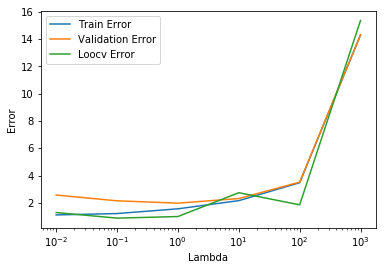

In [65]:
plt.semilogx(lam,train_error,label = "Train Error")
plt.semilogx(lam,val_error,label = "Validation Error")
plt.semilogx(lam,es,label = "Loocv Error")
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.savefig("error_plot1")
plt.legend()

In [87]:
#best loocv error is at lamda 0.1 so for that lamda 
#regularization term is 
reg_term = 0.1 * np.dot(ws[1].T,ws[1])
obj_value = ofs[1]
training_error = train_error[1]
print("lambda: {}, reg term: {}, obj value: {}, train error: {}".format(0.1,reg_term,obj_value,training_error))

lambda: 0.1, reg term: 2070.4456799914915, obj value: 2739.213902233741, train error: 1.222956840332517


In [90]:
sorted_w = np.argsort(ws[1])

In [110]:
sorted_w[0:10]
W = ws[1]
print("smallest weight with feature")
for i in sorted_w[0:10]:
    print("weight: {}, feature {}".format(W[i],[features1[i]]))
print("largest weight with feature")   
for i in sorted_w[2990:3000]:
     print("weight: {}, feature {}".format(W[i],[features1[i]]))

smallest weight with feature
weight: -7.015676947819884, feature [array(['bubbles', nan, nan], dtype=object)]
weight: -6.542199864218219, feature [array(['blend', 'zinfandel', nan], dtype=object)]
weight: -6.5365268212769365, feature [array(['dinner', nan, nan], dtype=object)]
weight: -6.330423664541442, feature [array(['apple', nan, nan], dtype=object)]
weight: -6.252449490881439, feature [array(['quickly', nan, nan], dtype=object)]
weight: -6.230890624760605, feature [array(['boasts', nan, nan], dtype=object)]
weight: -6.184702316076482, feature [array(['rusticity', nan, nan], dtype=object)]
weight: -6.165353750446684, feature [array(['lovely', nan, nan], dtype=object)]
weight: -6.081407099261924, feature [array(['blend', 'merlot', 'cabernet'], dtype=object)]
weight: -6.066012269939591, feature [array(['roll', nan, nan], dtype=object)]
largest weight with feature
weight: 8.203320767973423, feature [array(['large', nan, nan], dtype=object)]
weight: 8.261576538749363, feature [array(['

In [96]:
features = pd.read_csv('featureTypes.txt', sep=" ", header=None)

In [104]:
features1 = features.values

In [105]:
for i in sorted_w[0:10]:
    print(features1[i])

['bubbles' nan nan]
['blend' 'zinfandel' nan]
['dinner' nan nan]
['apple' nan nan]
['quickly' nan nan]
['boasts' nan nan]
['rusticity' nan nan]
['lovely' nan nan]
['blend' 'merlot' 'cabernet']
['roll' nan nan]


In [107]:
print("largest w")   
for i in sorted_w[2990:3000]:
    print(features1[i])

largest w
['large' nan nan]
['sweet' 'black' nan]
['chunky' nan nan]
['pineapple' 'orange' nan]
['truly' nan nan]
['huge' nan nan]
['ageability' nan nan]
['lifesaver' nan nan]
['add' nan nan]
['lingering' 'finish' nan]


In [111]:
#I am trying kaggle cahlange for one last time

In [112]:
W = ws[1]

In [113]:
a = 0.1 * (np.dot(W.T,W))

In [114]:
a

2070.4456799914915